In [1]:
from pyomo.environ import *
import matplotlib.pyplot as plt
import numpy as np
import random 

In [2]:
model = AbstractModel()
model.N = Param(mutable=True)
model.i = RangeSet(1, model.N)
model.j = Set(initialize=model.i)
model.R=Param(mutable=True)
def initval(model,i):
    return random.uniform(0,1)

model.x = Var(model.i , bounds=(0,2*model.R), within=NonNegativeReals, initialize=initval)
model.y = Var(model.i ,bounds=(0,2*model.R) , within=NonNegativeReals, initialize=initval)
model.r = Var(within=NonNegativeReals)
def C1_rule(model,i,j):
    if i!=j:
        return (model.x[i]-model.x[j])**2+(model.y[i]-model.y[j])**2 >=model.r**2
    else:
        return Constraint.Skip
model.C1   = Constraint(model.i,model.j, rule=C1_rule)

def C2_rule(model,i):
        return (model.x[i]-model.R)**2+(model.y[i]-model.R)**2 <=model.R**2
model.C2   = Constraint(model.i, rule=C2_rule)


model.obj = Objective(expr=model.r, sense=maximize)
opt = SolverFactory('ipopt')
#instance.display()

In [3]:
#instance = model.create_instance("ex20.dat")
model.R=1
model.N=20
instance = model.create_instance()
results = opt.solve(instance) # solves and updates instance

Min distance is  0.485


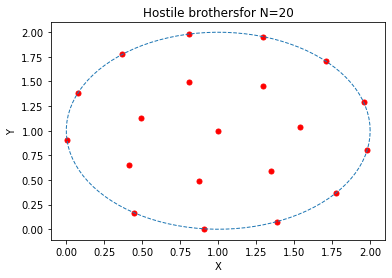

In [4]:
X=[value(instance.x[i]) for i in instance.i]
Y=[value(instance.y[i]) for i in instance.i]
plt.scatter( X,Y,s=25,color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Hostile brothersfor N='+str(value(instance.N)))
theta=np.linspace(0,2*np.pi,100)
Xc=value(instance.R)+value(instance.R)*np.cos(theta)
Yc=value(instance.R)+value(instance.R)*np.sin(theta)
plt.plot(Xc,Yc,'--',lw=1)
print('Min distance is ',round(value(instance.r),3))